In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
yelp=pd.read_csv('yelp.csv')

In [46]:
yelp.head()
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [47]:
yelp['text length']=yelp['text'].apply(len)

In [48]:
sns.set_style('white')

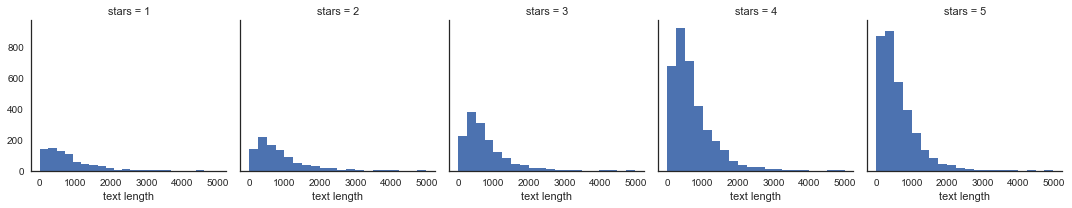

In [49]:
g=sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length',bins=20)

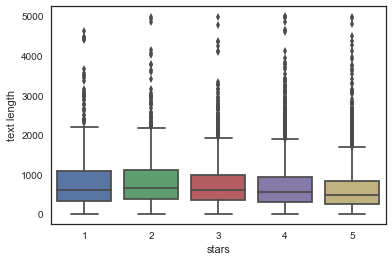

In [50]:
sns.boxplot(x='stars',y='text length',data=yelp)

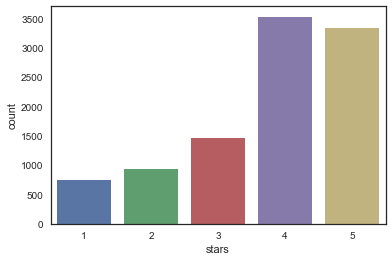

In [51]:
sns.countplot(x='stars',data=yelp)

In [52]:
stars=yelp.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [53]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


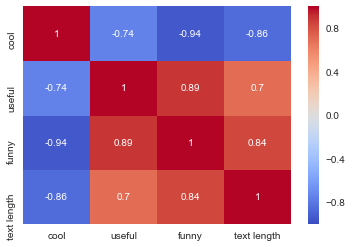

In [54]:
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

In [55]:
yelp_class=yelp[(yelp['stars']==1)|(yelp['stars']==5)]

In [56]:
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
business_id    4086 non-null object
date           4086 non-null object
review_id      4086 non-null object
stars          4086 non-null int64
text           4086 non-null object
type           4086 non-null object
user_id        4086 non-null object
cool           4086 non-null int64
useful         4086 non-null int64
funny          4086 non-null int64
text length    4086 non-null int64
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [57]:
X=yelp_class['text']
y=yelp_class['stars']

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
cv=CountVectorizer()

In [60]:
X=cv.fit_transform(X)

In [61]:
from sklearn.cross_validation import train_test_split 

In [62]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [63]:
from sklearn.naive_bayes import MultinomialNB

In [64]:
nb=MultinomialNB()

In [65]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [66]:
prediction=nb.predict(X_test)

In [67]:
from sklearn.metrics import confusion_matrix,classification_report

In [68]:
print(confusion_matrix(y_test,prediction))

[[159  69]
 [ 22 976]]


In [69]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226



In [70]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [76]:
pipe=Pipeline([('bow',CountVectorizer()),('tfidf',TfidfTransformer()),('model',MultinomialNB())])
#pipe=Pipeline()

In [77]:
X=yelp_class['text']
y=yelp_class['stars']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [78]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...ear_tf=False, use_idf=True)), ('model', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [79]:
prediction=pipe.predict(X_test)

In [80]:
  print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
